# 1. 머신러닝 4가지 분류

1. 지도 학습
2. 비지도 학습
3. 자기 지도 학습(self-supervised learning) - 레이블이 필요하지만 보통 경험적인 알고리즘을 사용해서 입력 데이터로부터 생성한다. (ex 오토 인코더)
4. 강화 학습

# 2. 머신러닝 모델 평가

### 1. 훈련 검증 테스트 세트
    
     - 검증 세트에서 모델의 성능을 평가하여 이런 튜닝을 수행한다. 본질적으로 어떤 튜닝도 어떤 파라미터 공간에서 좋은 설정을 찾는 학습이다. 결국 검증 세트의 성능을 기반으로 모델의 설정을 튜닝하면 검증 세트로 모델을 직접 훈련하지 않더라도 과대적합 될 수 있다.
     - 모델은 직간접적으로라도 테스트 세트에 대한 어떤 정보도 얻어서는 안 된다. 테스트 세트의 성능에 기초하여 튜닝한 모든 설정은 일반화 성능을 왜곡한다.

##  2. 단순 홀드아웃 검증

- train_data로 학습하고 validation_data로 검증한다.
- train, validation data를 모두 사용해서 test_data를 예측한다.

## 3. K 겹 교차 검증 

- 비교적 가용 데이터가 적고 정확하게 모델을 평가하고자 할 때 사용한다.
- 비용이 많이 든다.

# 3. 데이터 전처리

1. 벡터화
2. 정규화
    - 비교적 큰 값이나 균일하지 않은 데이터를 신경망에 주입하는 것은 위험하다. 이렇게 하면 업데이트할 그래디언트가 커져 네트워크가 수렴하는 것을 방해한다. 네트워크를 쉽게 학습시키려면 데이터가 다음의 특징을 따라야 한다.
        - 작은 값을 취합니다. 일반적으로 대부분의 값이 0 ~ 1 사이어야 한다.
        - 균일해야 한다. 즉 모든 특성이 대체로 비슷한 범위를 가져야 한다.
    
3. 누락된 값 다루기
    - 일반적으로 신경망에서 0이 사전에 정의된 의미 있는 값이 아니라면 누락된 값을 0으로 입력해도 괜찮습니다. 네트워크가 0이 누락된 데이터를 의미한다는 것을 학습하면 이 값을 무시하기 시작할 것입니다.
    
4. Feature Engineering
    - 특성을 더 간단한 방식으로 표현하여 문제를 쉽게 만듭니다. 일반적으로 해당 문제에 대해서 아주 잘 이해하고 있어야 한다.
    - 좋은 특성은 적은 차원을 사용하여 문제를 더 멋지게 풀어낼 수 있다. 예를 들어 시계 바늘을 읽는 문제에 합성곱 신경망을 사용하는 것은 어울리지 않습니다.
    - 좋은 특성은 더 적은 데이터로 문제를 풀 수 있다. 딥러닝 모델이 스스로 특성을 학습하는 능력은 가용한 훈련 데이터 가 많을 대 발휘한다. 샘플 개수가 적다면 특성에 있는 정보가 중욯다.

# 4. 과대적합과 과소적합

- 머신러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기이다. 최적화는 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정한다. 반면에 일반화는 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행하는 지 의미한다. 물론, 모델을 만드는 목적은 좋은 일반화 성능을 얻는 것이다.

- 모델이 관련성이 없고 좋지 못한 패턴을 훈련 데이터에서 학습하지 못하도록 하려면 가장 좋은 방법은 더 많은 훈련 데이터를 더 모으는 것이다. 하지만 이것이 불가능할 떄 차선책은 정보에 제약을 가하는 것이다. 이런 식으로 규제를 피하는 처리 과정은 규제라고 한다.

## 4.1 네트워크 크기 축소

- 너무 많은 용량과 충분하지 않은 용량 사이의 절충점을 찾아야 한다.

In [4]:
# 자주 나타나는 단어 100개
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(path='imdb.npz', num_words=10000)

# word_index
word_index = imdb.get_word_index() # 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 각 위치에 있으면 1로 변환한다.
# binary encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Using TensorFlow backend.


## 1. 16 x 16

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras import losses
from keras import metrics

In [19]:
model = Sequential()

# 10000 feature 차원수
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

# 4. 검증 세트 준비하기

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 221us/step - loss: 0.5090 - binary_accuracy: 0.7765 - val_loss: 0.3754 - val_binary_accuracy: 0.8709
Epoch 2/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.2975 - binary_accuracy: 0.9017 - val_loss: 0.3111 - val_binary_accuracy: 0.8825
Epoch 3/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.2148 - binary_accuracy: 0.9308 - val_loss: 0.3155 - val_binary_accuracy: 0.8741
Epoch 4/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.1703 - binary_accuracy: 0.9455 - val_loss: 0.2810 - val_binary_accuracy: 0.8904
Epoch 5/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.1349 - binary_accuracy: 0.9584 - val_loss: 0.2962 - val_binary_accuracy: 0.8844
Epoch 6/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.1140 - binary_accuracy: 0.9649 - val_loss: 0.3167 - val_bi

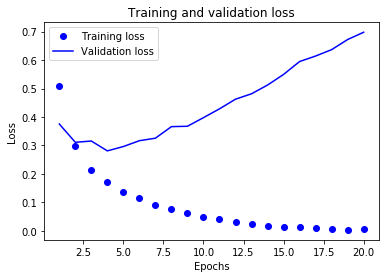

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## 2. 6 x 6

In [10]:
model = Sequential()

# 10000 feature 차원수
model.add(Dense(6, activation='relu', input_shape=(10000,)))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

# 4. 검증 세트 준비하기

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history1 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.6390 - binary_accuracy: 0.6795 - val_loss: 0.5890 - val_binary_accuracy: 0.8233
Epoch 2/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.5551 - binary_accuracy: 0.7942 - val_loss: 0.5375 - val_binary_accuracy: 0.8429
Epoch 3/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.5058 - binary_accuracy: 0.8443 - val_loss: 0.5093 - val_binary_accuracy: 0.7951
Epoch 4/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.4695 - binary_accuracy: 0.8737 - val_loss: 0.4831 - val_binary_accuracy: 0.8527
Epoch 5/20
15000/15000 [==============================] - 4s 251us/step - loss: 0.4409 - binary_accuracy: 0.8995 - val_loss: 0.4679 - val_binary_accuracy: 0.8745
Epoch 6/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.4175 - binary_accuracy: 0.9141 - val_loss: 0.4619 - val_bi

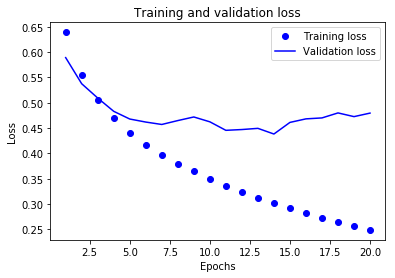

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict1 = history1.history
loss = history_dict1['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- 작은 모델은 더 늦게 과대 적합 된다. 하지만 성능은 저하되었다.

## 3. 128 x 128

In [12]:
model = Sequential()

# 10000 feature 차원수
model.add(Dense(128, activation='relu', input_shape=(10000,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

# 4. 검증 세트 준비하기

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.4909 - binary_accuracy: 0.7737 - val_loss: 0.4069 - val_binary_accuracy: 0.8215
Epoch 2/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.2672 - binary_accuracy: 0.8942 - val_loss: 0.2808 - val_binary_accuracy: 0.8921
Epoch 3/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.1756 - binary_accuracy: 0.9334 - val_loss: 0.3599 - val_binary_accuracy: 0.8646
Epoch 4/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1244 - binary_accuracy: 0.9577 - val_loss: 0.3168 - val_binary_accuracy: 0.8888
Epoch 5/20
15000/15000 [==============================] - 4s 246us/step - loss: 0.0828 - binary_accuracy: 0.9728 - val_loss: 0.3874 - val_binary_accuracy: 0.8774
Epoch 6/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.0864 - binary_accuracy: 0.9747 - val_loss: 0.3640 - val_bi

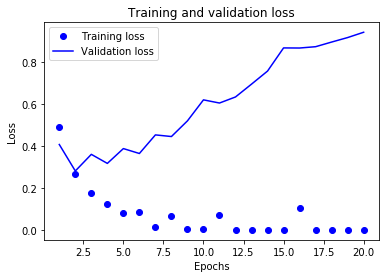

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- 큰 모델일 수록 훈련 손실이 매우 빠르게 0에 가까워진다. 용량이 많은 네트워크일수록 더 빠르게 훈련 데이터를 모델링할 수 있다. 과대적합에 민감해진다.

## 4-2. 가중치 규제 추가

In [21]:
from keras import regularizers

1. 페널티 항은 훈련할 때만 추가된다.
2. 네트워크의 손실은 테스트보다 훈련할 때 더 높다.
3. 종류
    - l1: l1 norm 
    - l2: l2 norm(weight_decay)
    - l1_l2: l1 + l2

In [22]:
model = Sequential()

# 10000 feature 차원수
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

# 4. 검증 세트 준비하기

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 204us/step - loss: 0.5872 - binary_accuracy: 0.7692 - val_loss: 0.4527 - val_binary_accuracy: 0.8714
Epoch 2/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.3790 - binary_accuracy: 0.8959 - val_loss: 0.3677 - val_binary_accuracy: 0.8861
Epoch 3/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.3027 - binary_accuracy: 0.9147 - val_loss: 0.3756 - val_binary_accuracy: 0.8675
Epoch 4/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.2627 - binary_accuracy: 0.9319 - val_loss: 0.3310 - val_binary_accuracy: 0.8923
Epoch 5/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.2370 - binary_accuracy: 0.9391 - val_loss: 0.3566 - val_binary_accuracy: 0.8811
Epoch 6/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.2236 - binary_accuracy: 0.9443 - val_loss: 0.3866 - val_bi

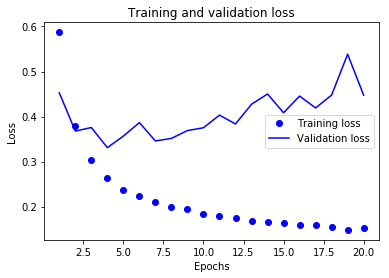

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제한다.

## 4-3. 드롭아웃 추가

1. 드롭아웃 비율은 0이 될 특성의 비율이다. 

    - 보통 0.2에서 0.5사이로 지정된다. 테스트 단계에서는 어느 유닛도 드롭아웃 되지 않습니다. 그 대신에 출력을 드롭아웃 비율에 비례하여 줄여줍니다. 훈련할 때 보다 더 많은 유닛이 활성화되기 때문입니다.

In [26]:
# 훈련할 때 유닛의 출력 중 50%를 버립니다.
layer_output *= np.random.randoint(0, 2, size=layer_output.shape)

# 테스트할 때는 드랍아웃 비율로 출력을 낮추어 주어야 한다. 
layer_output*= 0.5

# 훈련 단계에 이 두 연산을 포함시켜 테스트 단계에서는 출력을 그대로 두도록 구현할 수 있다. 실제로 종종 이런 방식으로 구현한다.
layer_output *= np.random.randoint(0, 2, size=layer_output.shape)
layer_output /= 0.5

NameError: name 'layer_output' is not defined

- 각 샘플에 대해 뉴런의 일부를 무작위하게 제거하면 뉴런의 부정한 협업을 방지하고 결국 과대적합을 감소시킨다는 것을 깨달았다.
- 핵심 아이디어는 층의 출력 값에 노이즈를 추가하여 중요하지 않은 우연한 패턴(힌튼이 이야기한 부정한 협업)을 깨뜨리는 것입니다. 노이즈가 없다면 네트워크가 이 패턴을 기억하기 시작할 것이다.

In [28]:
from keras import layers

In [29]:
model = Sequential()

# 10000 feature 차원수
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

# 4. 검증 세트 준비하기

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 254us/step - loss: 0.6449 - binary_accuracy: 0.6685 - val_loss: 0.5132 - val_binary_accuracy: 0.8568
Epoch 2/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.5050 - binary_accuracy: 0.8045 - val_loss: 0.4147 - val_binary_accuracy: 0.8744
Epoch 3/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.4305 - binary_accuracy: 0.8493 - val_loss: 0.3548 - val_binary_accuracy: 0.8901
Epoch 4/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.3824 - binary_accuracy: 0.8773 - val_loss: 0.3303 - val_binary_accuracy: 0.8935
Epoch 5/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.3429 - binary_accuracy: 0.8913 - val_loss: 0.3292 - val_binary_accuracy: 0.8901
Epoch 6/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.3121 - binary_accuracy: 0.9097 - val_loss: 0.3412 - val_bi

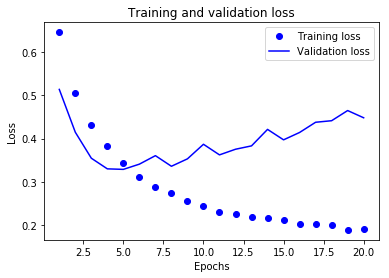

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 4.5 보편적인 머신러닝 작업흐름

### 1. 문제 정의와 데이터셋 수집

   - 문제 정의: 1) 문제 유형 2) 데이터 유형
    
   - 가설1: 주어진 입력으로 출력을 예측할 수 있다.
   - 가설2: 가용한 데이터에 입력과 출력 사이의 관계를 학습하는 데 충분한 정보가 있다고 가설을 세운다.

   <b>모델이 작동하기 전까지 이는 가설에 불과하다</b><br/><br/>
    
   - 풀기 어려운 문제는 시간에 따라 변하는 문제이다. 옷을 위한 추천 엔진을 구축한다고 가정한다. 이런 경우에 최근의 데이터로 주기적으로 모델을 다시 훈련하거나 시간 분포에 맞게 데이터를 수집하여 시간에 따라 변하지 않는 문제를 바꿉니다. (1년 중 언제인지 기록한 시간도 모델에 입력해야 한다)
  
   - 머신 러닝은 훈련 데이터에 있는 패턴을 기억하기 위해서만 사용한다. 이미 보았던 것만 인식할 수 있다. 미래를 예측하기 위해 과거 데이터에서 훈련한 머신 러닝을 사용하는 것은 미래가 과거처럼 움직인다고 가정하는 것이다.

### 2. 성공 지표 선택
    
    - 클래스 분포가 균일한 분류 문제에서는 정확도와 ROC AUC가 일반적이다.
    - 랭킹 문제나 다중 레이블 문제에서는 평균 정밀도를 사용할 수 있다.
    - 성공을 측정하기 위해 자신만의 지표를 설정하는 것은 일반적이지 않다.

### 3. 평가 방법 선택

   - 홀드아웃 세트 분리: 데이터가 풍부할 때 사용
   - K 겹 교차 검증: 홀드아웃을 사용하기에 샘플의 수가 너무 적을 때 사용한다.
   - 반복 K겹 교차 검증: 데이터가 적고 매우 정확한 모델 평가가 필요할 때 사용한다.

### 4. 데이터 준비
   - 데이터 전처리 
    

### 5. 기본보다 나은 모델 훈련하기

   - 통계적 검정력을 달성하는 것이 항상 가능하지 않다. 여러 개의 타당성 있는 네트워크 구조를 시도해보고 무작위로 예측하는 모델보다 낫지 않다면 입력 데이터에 존재하지 않는 것을 얻으려고 한다는 신호일 것이다. 2개의 가설이 있다는 것을 기억하세요.

   - 가설1: 주어진 입력으로 출력을 예측할 수 있다.
   - 가설2: 가용한 데이터에 입력과 출력 사이의 관계를 학습하는 데 충분한 정보가 있다고 가설을 세운다.
    
    <b>이 가설이 잘못된 것일 수 있습니다. 이 때는 기획부터 다시 해야 합니다.</b>
    
   - 일이 잘 진행된다고 하면 활성화 함수, 손실 함수, 최적화 설정을 한다. 

### 6. 몸집 키우기

- 통계적 검정력을 가진 모델을 얻었다면 이제 모델이 충분히 성능을 내는지 질문해야 한다.
- 머신러닝은 최적화와 일반화 사이의 줄다리기이다. 과소적합과 과대적합 사이, 즉 과소 용량과 과대용량 경계에 적절히 위치한 모델이 이상적이다. 이 경계가 어디에 위치하는지 찾기 위해서는 먼저 지나쳐 봐야 한다.
    - 층을 추가한다.
    - 층의 크기를 키운다.
    - 더 많은 에포크 동안 훈련한다.
- 그 다음은 규제와 모델 튜닝을 시작하여 이상적인 모델에 가깝도록 만든다.

### 7. 모델 규제와 하이퍼파라미터 튜닝

- 이 단계가 시간의 대부분을 차지한다.
- 반복적으로 모델을 수정하고 훈련하고 검증 데이터에서 평가한다. 그리고 다시 수정하고 가능한 좋은 모델을 얻을 때까지 반복한다.
    - 드롭 아웃을 추가한다.
    - 층을 추가하거나 제거해서 다른 구조를 시도한다.
    - L1, L2를 추가한다.
    - 최적의 설정을 찾기위해 하이퍼파라미터를 바꾸어 시도한다.
    - 선택적으로 특성 공학을 시도한다.
    
- 검증 과정에서 얻은 피드백을 사용하여 모델을 튜닝할 떄마다 검증 과정에 대한 정보를 모델에 누설하고 있다는 점이다. 몇 번만 반복하는 것은 문제가 되지 않는다. 하지만 많이 반복하면 결국 모델이 검증 과정에 과대적합될 것이다. 이는 검증 과정의 신뢰도를 감소시킨다.

- 만족할 만한 모델 설정을 얻었다면 가용한 모든 데이터로 최종 모델을 훈련한다. 그리고 마지막에 딱 한 번 테스트 세트에서 평가한다. 테스트 성능이 검증 성능보다 많이 나쁘면 검증 데이터에 과적합된 것이다. 이때는 좀 더 신뢰할만한 평가 방법으로 바꾸는 것이 좋습니다.